In [1]:
%load_ext autoreload
%autoreload 2

import mlproof as mlp
import mlproof.nets as nets

import numpy as np

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
cnn = nets.MergeNetDropout()

CNN configuration: 
    Our CNN with different "legs" for image, prob, merged_array, border_overlap.

    Now with dropout layers.
    


In [3]:
X_train, y_train, X_test, y_test = mlp.Patch.load('cylinder1')

Loaded /home/d/patches//cylinder1/ in 0.19751906395 seconds.


In [4]:
cnn = cnn.fit({'image_input': X_train['image'],
               'prob_input': X_train['prob'],
               'binary_input': X_train['merged_array'],
               'border_input': X_train['larger_border_overlap']},
               y_train)

# Neural Network with 1511874 learnable parameters

## Layer information

  #  name            size
---  --------------  --------
  0  image_input     1x75x75
  1  image_conv1     16x63x63
  2  image_pool1     16x31x31
  3  image_conv2     16x19x19
  4  image_pool2     16x9x9
  5  image_dropout   16x9x9
  6  prob_input      1x75x75
  7  prob_conv1      16x63x63
  8  prob_pool1      16x31x31
  9  prob_conv2      16x19x19
 10  prob_pool2      16x9x9
 11  prob_dropout    16x9x9
 12  binary_input    1x75x75
 13  binary_conv1    16x63x63
 14  binary_pool1    16x31x31
 15  binary_conv2    16x19x19
 16  binary_pool2    16x9x9
 17  binary_dropout  16x9x9
 18  border_input    1x75x75
 19  border_conv1    16x63x63
 20  border_pool1    16x31x31
 21  border_conv2    16x19x19
 22  border_pool2    16x9x9
 23  border_dropout  16x9x9
 24  merge           64x9x9
 25  hidden3         256
 26  dropout3        256
 27  output          2

  epoch    train loss    valid loss    train/val    valid acc  dur
-

In [5]:
# this is the score on cylinder_small1 with regularization and patience counter 50 and data augmentation
cnn.score({'image_input': X_test['image'],
           'prob_input': X_test['prob'],
           'binary_input': X_test['merged_array'],
           'border_input': X_test['larger_border_overlap']},
           y_test)

0.9046464797136038

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

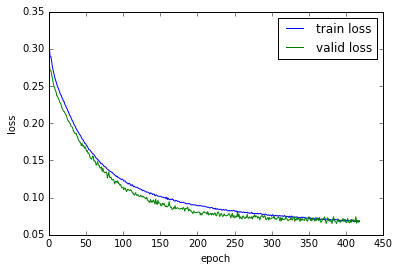

In [7]:
# this is the plot on cylinder_small1 with regularization and patience counter 50 and data augmentation
plot_loss(cnn)